In [1]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
with open('graph', 'rb') as f:
    graph = pickle.load(f)

In [3]:

G = nx.Graph(graph)


In [4]:
G.nodes

NodeView(('2018-2-345180', '2018-1-300631', '2017-2-257013', '2018-1-302064', '2017-1-181141', '2018-2-346103', '2017-1-182232', '2017-1-182262', '2017-2-257000', '2017-1-181138', '2018-1-300658', '2018-2-350548', '2018-1-301160', '2017-2-257739', '2018-1-299278', '2018-2-350190', '2017-2-257030', '2017-2-258470', '2018-1-302032', '2017-1-182987', '2017-1-181172', '2017-2-257735', '2017-2-258453', '2017-2-257756', '2017-2-257741', '2018-1-299276', '2018-2-346115', '2017-2-261456', '2017-1-182231', '2017-2-261446', '2017-2-261435'))

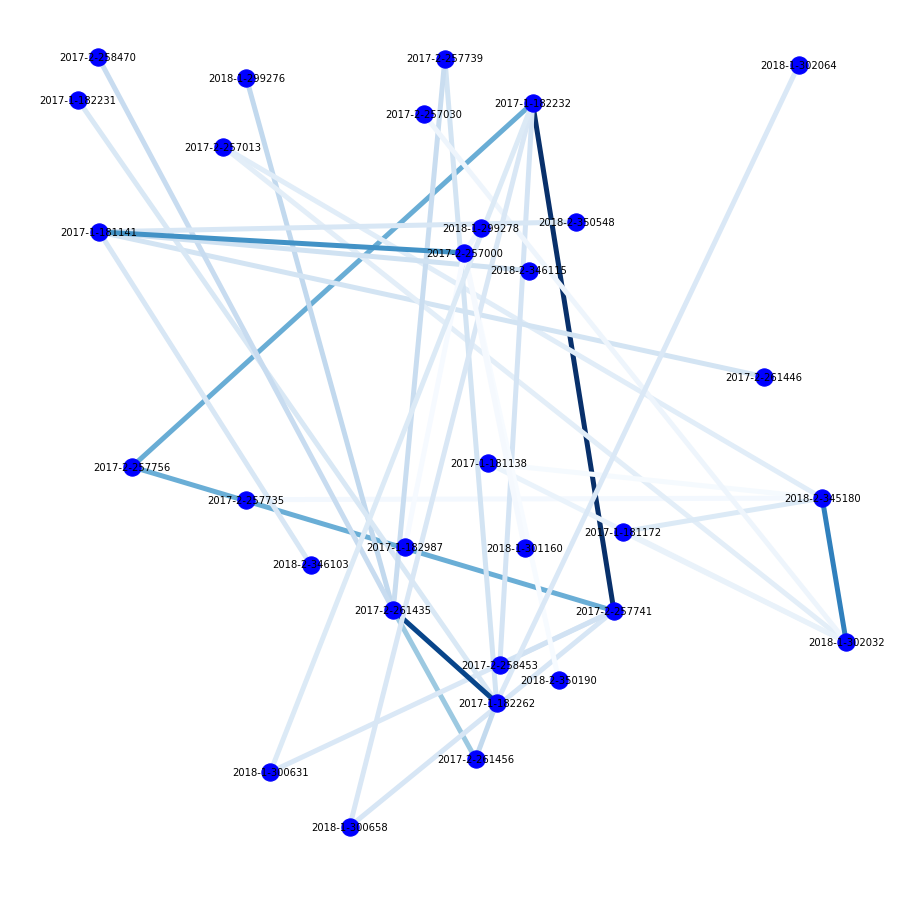

In [98]:
plt.figure(figsize=(12,12))
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
#nx.draw(G,pos=nx.spring_layout(G),edge_labels=labels)#with_labels=True
#nx.draw(G, node_color='b', edgelist=edges, edge_color=weights, width=2.0, edge_cmap=plt.cm.Blues,node_size=20)
nx.draw_random(G, node_color='b',edgelist=edges, edge_color=weights, width=5.0, 
                edge_cmap=plt.cm.Blues,node_size=300,font_size=10, with_labels = True)
#nx.draw_circular(G, node_color='b', edgelist=edges, edge_color=weights, width=1.0, 
 #                edge_cmap=plt.cm.Blues,node_size=300,font_size=10, with_labels = True)
#nx.draw_spectral(G, node_color='b', edgelist=edges, edge_color=weights, width=2.0, edge_cmap=plt.cm.Blues,node_size=20)
#nx.draw_spring(G, node_color='b', edgelist=edges, edge_color=weights, width=2.0, edge_cmap=plt.cm.Blues, node_size=20)

plt.draw() 

In [5]:
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models.graphs import from_networkx
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, BoxZoomTool, ResetTool

In [6]:
plot = figure(title="Networkx Integration Demonstration", x_range=(-2.1,2.1), y_range=(-2.1,2.1), tools="")
graphOut = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("weight", "@weight")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())
plot.renderers.append(graphOut)
output_file("networkx_graph.html")
show(plot)

In [8]:
from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool,LinearColorMapper
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4, Spectral6
from bokeh.transform import linear_cmap


plot = Plot(plot_width=600, plot_height=600, x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
#plot.title.text = "Graph Interaction Demonstration"
graph_renderer = from_networkx(G, nx.circular_layout, scale=1, center=(0,0))

node_hover_tool = HoverTool(tooltips=[("Documento", "@index")])

plot.add_tools(node_hover_tool, TapTool(), BoxSelectTool())
##
graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_dash='dashed', line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
#graph_renderer.inspection_policy = EdgesAndLinkedNodes()
##

plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

In [130]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
c = sorted(map(sorted, next_level_communities))
print(len(c[5]))

4


In [107]:
len(G.nodes)

31